In [1]:
import importlib
import volpy_func_lib as vp
import load_clean_lib
import table_lib
import vol_strat_lib as vs
import option_returns as orpy
from global_settings import *
import pandas as pd
import numpy as np

importlib.reload(vp)
importlib.reload(load_clean_lib)
importlib.reload(table_lib)
importlib.reload(vs)
importlib.reload(orpy)

c:\Users\axell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<module 'option_returns' from 'c:\\Users\\axell\\Desktop\\CBS\\master\\volpy\\option_returns.py'>

### import orpy

In [2]:
df_orpy = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\volpy data output\sp100_pseudo\c_df_orpy.csv")
df_orpy["date"] = pd.to_datetime(df_orpy["date"])

sum_df = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\volpy data output\sp100_pseudo\c_summary_dly.csv")
sum_df["date"] = pd.to_datetime(sum_df["date"])
sum_df[f"return_next"] = sum_df[f"return"].shift(-1)

In [166]:
df_orpy = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\volpy data output\sp100_pseudo2\t_df_orpy.csv")
df_orpy["date"] = pd.to_datetime(df_orpy["date"])

sum_df = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\volpy data output\sp100_pseudo2\t_summary_dly.csv")
sum_df["date"] = pd.to_datetime(sum_df["date"])
sum_df[f"return_next"] = sum_df[f"return"].shift(-1)

In [228]:
sum_df = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\volpy data output\oex_only2\t_summary_dly.csv")
sum_df["date"] = pd.to_datetime(sum_df["date"])
sum_df[f"return_next"] = sum_df[f"return"].shift(-1)

In [360]:
sum_df = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\OptionMetrics\volpy data output\OEX_constituents_short\t_summary_dly.csv")
sum_df["date"] = pd.to_datetime(sum_df["date"])
sum_df[f"return_next"] = sum_df[f"return"].shift(-1)

In [215]:
oex_constituents = pd.read_excel(r"C:\Users\axell\Desktop\CBS\data\constituents.xlsx", sheet_name="OEXQ")
oex_constituents.columns = oex_constituents.columns.map(str)
oex_constituents_cleaned = oex_constituents.loc[:, ~oex_constituents.columns.str.contains("Unnamed")]
oex_constituents_fixed = oex_constituents_cleaned.iloc[1:].copy()

df_long = oex_constituents_fixed.melt(var_name="date", value_name="ticker")
df_long["date"] = pd.to_datetime(df_long["date"])
df_long = df_long.dropna(subset=["ticker"])
df_long["ticker"] = df_long["ticker"].astype(str).str.split(" ").str[0].str.strip()
df_long = df_long[df_long["ticker"] != ""]
oex_constituents_long = df_long

rename_map = {
    "0203524D": "NSM",
    "NRTLQ": "NT",
    "MTLQQ": "GM",
    "LEHMQ": "LEH",
    "NAN": "NQN",
    "RSHCQ": "RSH",
    "987200Q": "MAY",
    "748957Q": "PNU",
    "653707Q": "T",
    "605555Q": "S",
    "3621240Q": "ONE",
    "3605818Q": "HCA",
    "3346Q": "UBAN",
    "2968900Q": "IHRT",
    "2258717D": "EMC",
    "GBLXQ": "GBLX",
    "ENRNQ": "ENE",
    "EKDKQ": "KODK",
    "DALRQ": "DAL",
    "RTN/B": "RTNB",
    "1996074D": "EP",
    "3393199Q": "BUD",
    "1683997D": "DELL",
    "0848680D": "FYBR",
    "1255173D": "WB",
    "2071296D": "NYX",
    "1856613D": "MON",
    "BRK/B": "BRK",
    "9903115D": "CLB",
    "1028411Q": "G",
    "1697067D": "DOW",
    "1715651D": "DD"
}

# Omdøb tickers i din DataFrame
oex_constituents_long["ticker"] = oex_constituents_long["ticker"].replace(rename_map)

In [263]:
import pandas as pd

# Sæt filsti
file_path = r"C:\Users\axell\Desktop\CBS\data\crisp_data5.csv"

# Definér de relevante tickers på forhånd
relevant_tickers = set(oex_constituents_long["ticker"].unique())

# Opret tom liste til chunks
filtered_chunks = []

# Indlæs CSV i chunks
chunk_size = 500_000  # du kan justere denne størrelse efter behov

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    # Filtrér på relevante tickere
    chunk_filtered = chunk[chunk["TICKER"].isin(relevant_tickers)].copy()
    filtered_chunks.append(chunk_filtered)

# Saml alle filtrerede chunks
crsp_data = pd.concat(filtered_chunks, ignore_index=True)

# Done
print(f"CRSP-data form: {crsp_data.shape}")


CRSP-data form: (1089089, 8)


In [325]:
import pandas as pd

# Sæt filsti
file_path = r"C:\Users\axell\Desktop\CBS\data\crisp_data5.csv"

# Opret tom liste til chunks
oef_chunks = []

# Indlæs CSV i chunks
chunk_size = 500_000  # kan justeres hvis nødvendigt

for chunk in pd.read_csv(file_path, chunksize=chunk_size, low_memory=False):
    # Filtrér kun OEF
    chunk_filtered = chunk[chunk["TICKER"] == "OEF"].copy()
    oef_chunks.append(chunk_filtered)

# Saml alle OEF-chunks
crsp_data_oef = pd.concat(oef_chunks, ignore_index=True)

# Konvertér dato
crsp_data_oef["date"] = pd.to_datetime(crsp_data_oef["date"])

# Vælg relevante kolonner
crsp_data_oef = crsp_data_oef[["date", "RET"]].rename(columns={"RET": "oef_return"})

# Rens data
crsp_data_oef["oef_return"] = pd.to_numeric(crsp_data_oef["oef_return"], errors="coerce")
crsp_data_oef = crsp_data_oef.dropna(subset=["oef_return"])

print(f"Antal rækker hentet: {len(crsp_data_oef)}")
print(crsp_data_oef.head())


Antal rækker hentet: 4095
        date  oef_return
1 2008-09-24   -0.000542
2 2008-09-25    0.022740
3 2008-09-26    0.014415
4 2008-09-29   -0.088421
5 2008-09-30    0.020785


In [101]:
# crsp_data = pd.read_csv(r"C:\Users\axell\Desktop\CBS\data\crisp_data3.csv")

# relevant_tickers = oex_constituents_long["ticker"].unique()
# crsp_data = crsp_data[crsp_data["TICKER"].isin(relevant_tickers)].copy()

In [ ]:
# import pandas as pd # V1

# # Sørg for datetime
# crsp_data["date"] = pd.to_datetime(crsp_data["date"])
# oex_constituents_long["date"] = pd.to_datetime(oex_constituents_long["date"])

# # Handelsdage
# trading_days = crsp_data[["date"]].drop_duplicates().sort_values("date").reset_index(drop=True)

# # Unikke skæringsdatoer i oex constituents
# constituent_dates = oex_constituents_long["date"].sort_values().unique()

# # Vi laver en lookup: for hver trading_day finder vi gældende constituent dato
# date_lookup = []
# for trading_day in trading_days["date"]:
#     valid_dates = constituent_dates[constituent_dates <= trading_day]
#     if len(valid_dates) == 0:
#         continue  # ingen constituents endnu
#     last_valid_date = valid_dates[-1]
#     date_lookup.append((trading_day, last_valid_date))

# lookup_df = pd.DataFrame(date_lookup, columns=["date", "constituent_date"])

# # Merge for at få tickers til hver constituent_date
# expanded = lookup_df.merge(
#     oex_constituents_long,
#     left_on="constituent_date",
#     right_on="date",
#     suffixes=("_trading", "_constituent")
# )

# # Behold kun relevante kolonner
# expanded_constituents = expanded[["date_trading", "ticker"]]
# expanded_constituents = expanded_constituents.rename(columns={"date_trading": "date"}).sort_values(["date", "ticker"]).reset_index(drop=True)


In [ ]:
# import pandas as pd # V2

# # Sørg for datetime
# crsp_data["date"] = pd.to_datetime(crsp_data["date"])
# oex_constituents_long["date"] = pd.to_datetime(oex_constituents_long["date"])

# # Handelsdage
# trading_days = crsp_data[["date"]].drop_duplicates().sort_values("date").reset_index(drop=True)

# # Unikke skæringsdatoer i oex constituents
# constituent_dates = oex_constituents_long["date"].sort_values().unique()

# # Vi laver en lookup: for hver trading_day finder vi gældende constituent dato
# date_lookup = []
# for trading_day in trading_days["date"]:
#     valid_dates = constituent_dates[constituent_dates <= trading_day]
#     if len(valid_dates) == 0:
#         continue  # ingen constituents endnu
#     last_valid_date = valid_dates[-1]
#     date_lookup.append((trading_day, last_valid_date))

# lookup_df = pd.DataFrame(date_lookup, columns=["date", "constituent_date"])

# # Merge for at få tickers til hver constituent_date
# expanded = lookup_df.merge(
#     oex_constituents_long,
#     left_on="constituent_date",
#     right_on="date",
#     suffixes=("_trading", "_constituent")
# )

# # Behold kun relevante kolonner
# expanded_constituents = expanded[["date_trading", "ticker"]]
# expanded_constituents = expanded_constituents.rename(columns={"date_trading": "date"}).sort_values(["date", "ticker"]).reset_index(drop=True)

# # -------------------------------------
# # Håndtér return-koder fra CRSP
# # -------------------------------------

# # Sørg for numeriske kolonner
# crsp_data["RET"] = pd.to_numeric(crsp_data["RET"], errors="coerce")
# crsp_data["DLRET"] = pd.to_numeric(crsp_data["DLRET"], errors="coerce")

# # Kombinér afkast: brug DLRET hvis RET mangler
# crsp_data["RET_combined"] = crsp_data["RET"].combine_first(crsp_data["DLRET"])

# # Fjern ugyldige return-koder
# invalid_codes = [-66.0, -77.0, -88.0, -99.0]
# crsp_data = crsp_data[~crsp_data["RET_combined"].isin(invalid_codes)]


In [ ]:
import pandas as pd # V3
import numpy as np

# Sørg for datetime-format
crsp_data["date"] = pd.to_datetime(crsp_data["date"])
crsp_data["NEXTDT"] = pd.to_datetime(crsp_data["NEXTDT"])  # NY!
oex_constituents_long["date"] = pd.to_datetime(oex_constituents_long["date"])

# Handelsdage fra CRSP
trading_days = crsp_data[["date"]].drop_duplicates().sort_values("date").reset_index(drop=True)

# Unikke skæringsdatoer i constituents
constituent_dates = oex_constituents_long["date"].sort_values().unique()

# Match hver handelsdag med seneste gældende constituent-dag
date_lookup = []
for trading_day in trading_days["date"]:
    valid_dates = constituent_dates[constituent_dates <= trading_day]
    if len(valid_dates) == 0:
        continue
    last_valid_date = valid_dates[-1]
    date_lookup.append((trading_day, last_valid_date))

lookup_df = pd.DataFrame(date_lookup, columns=["date", "constituent_date"])

# Tilføj tickere fra constituents
expanded = lookup_df.merge(
    oex_constituents_long,
    left_on="constituent_date",
    right_on="date",
    suffixes=("_trading", "_constituent")
)

# Kun relevante kolonner
expanded_constituents = expanded[["date_trading", "ticker"]]
expanded_constituents = expanded_constituents.rename(columns={"date_trading": "date"}).sort_values(["date", "ticker"]).reset_index(drop=True)

# -------------------------------------
# Håndtér CRSP-afkast og DLRET korrekt
# -------------------------------------

# Sørg for numeriske kolonner
crsp_data["RET"] = pd.to_numeric(crsp_data["RET"], errors="coerce")
crsp_data["DLRET"] = pd.to_numeric(crsp_data["DLRET"], errors="coerce")

# Ugyldige return-koder
invalid_ret_codes = [-66.0, -77.0, -88.0, -99.0]
invalid_dlret_codes = [-55.0, -66.0, -88.0, -99.0]

# Sæt til NaN hvor ugyldigt
crsp_data.loc[crsp_data["RET"].isin(invalid_ret_codes), "RET"] = np.nan
crsp_data.loc[crsp_data["DLRET"].isin(invalid_dlret_codes), "DLRET"] = np.nan

# Delisting returns indsættes med NEXTDT som dato
dlret_df = crsp_data[["NEXTDT", "TICKER", "DLRET"]].dropna().rename(
    columns={"NEXTDT": "date", "TICKER": "ticker"}
)

# Merge expanded_constituents med RET (almindelige returns)
merged = expanded_constituents.merge(
    crsp_data[["date", "TICKER", "PRC", "SHROUT", "RET"]],
    left_on=["date", "ticker"],
    right_on=["date", "TICKER"],
    how="left"
)

# Merge delisting returns (DLRET) på NEXTDT
merged = merged.merge(
    dlret_df,
    on=["date", "ticker"],
    how="left"
)

# Beregn market cap
merged["market_cap"] = merged["PRC"].abs() * merged["SHROUT"]

# Kombinér return og DLRET: (1 + RET)*(1 + DLRET) - 1
merged["RET_combined"] = (1 + merged["RET"]) * (1 + merged["DLRET"].fillna(0)) - 1

# Fjern manglende returns og market cap
merged = merged.dropna(subset=["RET_combined", "market_cap"])
merged = merged.drop_duplicates(subset=["date", "ticker"])

# Beregn vægte og shift dem én dag bagud per ticker
merged["total_mc"] = merged.groupby("date")["market_cap"].transform("sum")
merged["weight"] = merged["market_cap"] / merged["total_mc"]
merged["weight"] = merged.groupby("ticker")["weight"].shift(1)

# Endelig portefølje-DataFrame
final_df = merged[["date", "ticker", "weight", "RET_combined"]].rename(columns={"RET_combined": "return"})
final_df = final_df.dropna(subset=["weight", "return"])


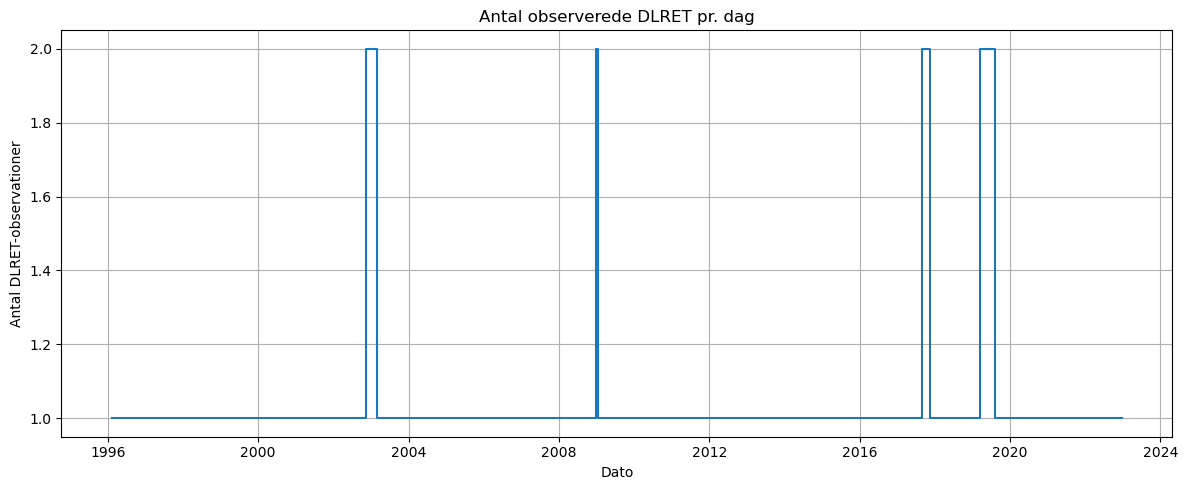

In [265]:
import matplotlib.pyplot as plt

# Konverter til numeric
crsp_data["DLRET"] = pd.to_numeric(crsp_data["DLRET"], errors="coerce")
crsp_data["date"] = pd.to_datetime(crsp_data["date"])

# Filtrér rækker med gyldige DLRET
dlret_valid = crsp_data[crsp_data["DLRET"].notna()]

# Grupér efter dato og tæl hvor mange DLRET findes
dlret_counts = dlret_valid.groupby("date").size()

# Plot
plt.figure(figsize=(12, 5))
plt.plot(dlret_counts.index, dlret_counts.values, drawstyle='steps-post')
plt.title("Antal observerede DLRET pr. dag")
plt.xlabel("Dato")
plt.ylabel("Antal DLRET-observationer")
plt.grid(True)
plt.tight_layout()
plt.show()


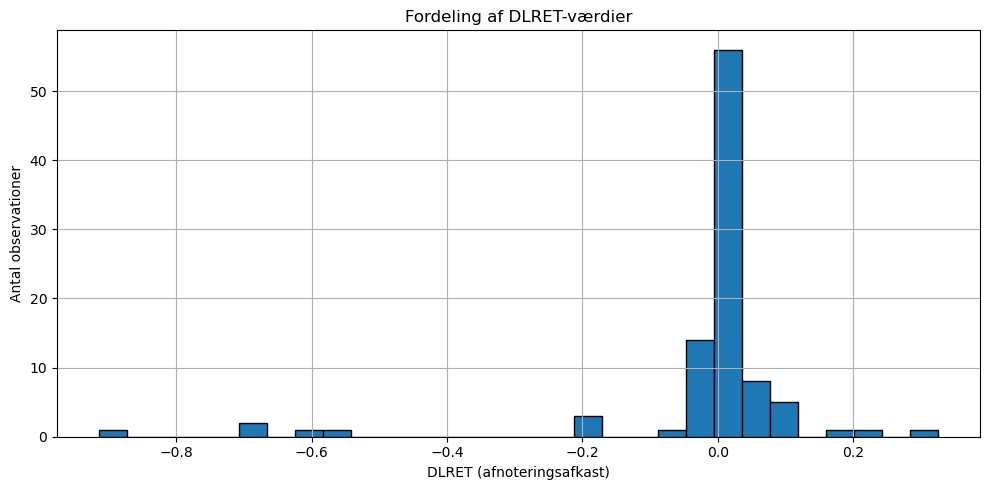

In [266]:
# Histogram over DLRET-værdier
plt.figure(figsize=(10, 5))
plt.hist(dlret_valid["DLRET"], bins=30, edgecolor='black')
plt.title("Fordeling af DLRET-værdier")
plt.xlabel("DLRET (afnoteringsafkast)")
plt.ylabel("Antal observationer")
plt.grid(True)
plt.tight_layout()
plt.show()


In [268]:
# # Angiv start- og slutdato
# start_date = pd.to_datetime("2024-02-28")
# end_date = pd.to_datetime("2024-03-03")

# # Filtrer expanded_constituents for de ønskede datoer
# subset = expanded_constituents[(expanded_constituents["date"] >= start_date) & (expanded_constituents["date"] <= end_date)].copy()

# # Tilføj hjælper-kolonne for at nummerere rækkerne
# subset["row"] = subset.groupby("date").cumcount()

# # Pivotér: Én kolonne pr. dato
# pivoted = subset.pivot(index="row", columns="date", values="ticker")

# # Udskriv uden afkortning
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(pivoted)


In [ ]:
# import pandas as pd

# # 1. Sørg for at dato er datetime begge steder
# crsp_data["date"] = pd.to_datetime(crsp_data["date"])
# expanded_constituents["date"] = pd.to_datetime(expanded_constituents["date"])

# # 2. Merge constituents med crsp på dato og ticker
# merged = expanded_constituents.merge(
#     crsp_data[["date", "TICKER", "PRC", "SHROUT", "RET"]],
#     left_on=["date", "ticker"],
#     right_on=["date", "TICKER"],
#     how="left"
# )

# # 3. Beregn markedsværdi
# merged["market_cap"] = merged["PRC"].abs() * merged["SHROUT"]

# # 4. Drop NaNs og dubletter
# merged = merged.dropna(subset=["market_cap", "RET"])
# merged = merged.drop_duplicates(subset=["date", "ticker"])

# # 5. Beregn samlet markedsværdi og vægt
# merged["total_mc"] = merged.groupby("date")["market_cap"].transform("sum")
# merged["weight"] = merged["market_cap"] / merged["total_mc"]

# # 6. Shift vægtene én dag bagud per ticker (brug forrige dags vægt)
# merged["weight"] = merged.groupby("ticker")["weight"].shift(1)

# # 7. Final dataframe
# final_df = merged[["date", "ticker", "weight", "RET"]].rename(columns={"RET": "return"})
# final_df["return"] = pd.to_numeric(final_df["return"], errors="coerce")
# final_df = final_df.dropna(subset=["weight", "return"])


In [272]:
# import pandas as pd # V2

# # 1. Sørg for at dato er datetime begge steder
# crsp_data["date"] = pd.to_datetime(crsp_data["date"])
# expanded_constituents["date"] = pd.to_datetime(expanded_constituents["date"])

# # 2. Merge constituents med CRSP på dato og ticker
# merged = expanded_constituents.merge(
#     crsp_data[["date", "TICKER", "PRC", "SHROUT", "RET_combined"]],
#     left_on=["date", "ticker"],
#     right_on=["date", "TICKER"],
#     how="left"
# )

# # 3. Beregn markedsværdi
# merged["market_cap"] = merged["PRC"].abs() * merged["SHROUT"]

# # 4. Drop NaNs og dubletter (brug RET_combined i stedet for RET)
# merged = merged.dropna(subset=["market_cap", "RET_combined"])
# merged = merged.drop_duplicates(subset=["date", "ticker"])

# # 5. Beregn samlet markedsværdi og vægt
# merged["total_mc"] = merged.groupby("date")["market_cap"].transform("sum")
# merged["weight"] = merged["market_cap"] / merged["total_mc"]

# # 6. Shift vægtene én dag bagud per ticker
# merged["weight"] = merged.groupby("ticker")["weight"].shift(1)

# # 7. Final dataframe
# final_df = merged[["date", "ticker", "weight", "RET_combined"]].rename(columns={"RET_combined": "return"})
# final_df["return"] = pd.to_numeric(final_df["return"], errors="coerce")
# final_df = final_df.dropna(subset=["weight", "return"])


In [275]:
# # Angiv start- og slutdato
# start_date = pd.to_datetime("2024-02-28")
# end_date = pd.to_datetime("2024-03-03")

# # Filtrer expanded_constituents for de ønskede datoer
# subset = final_df[(final_df["date"] >= start_date) & (final_df["date"] <= end_date)].copy()

# # Tilføj hjælper-kolonne for at nummerere rækkerne
# subset["row"] = subset.groupby("date").cumcount()

# # Pivotér: Én kolonne pr. dato
# pivoted = subset.pivot(index="row", columns="date", values="ticker")

# # Udskriv uden afkortning
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     display(pivoted)


In [277]:
final_df['return']

103       0.016092
104       0.000000
106       0.006693
107      -0.010730
108       0.008811
            ...   
738452    0.002315
738453    0.009849
738454   -0.002415
738455   -0.002429
738456    0.017114
Name: return, Length: 681262, dtype: float64

Mindste antal aktiver på en dag: 83


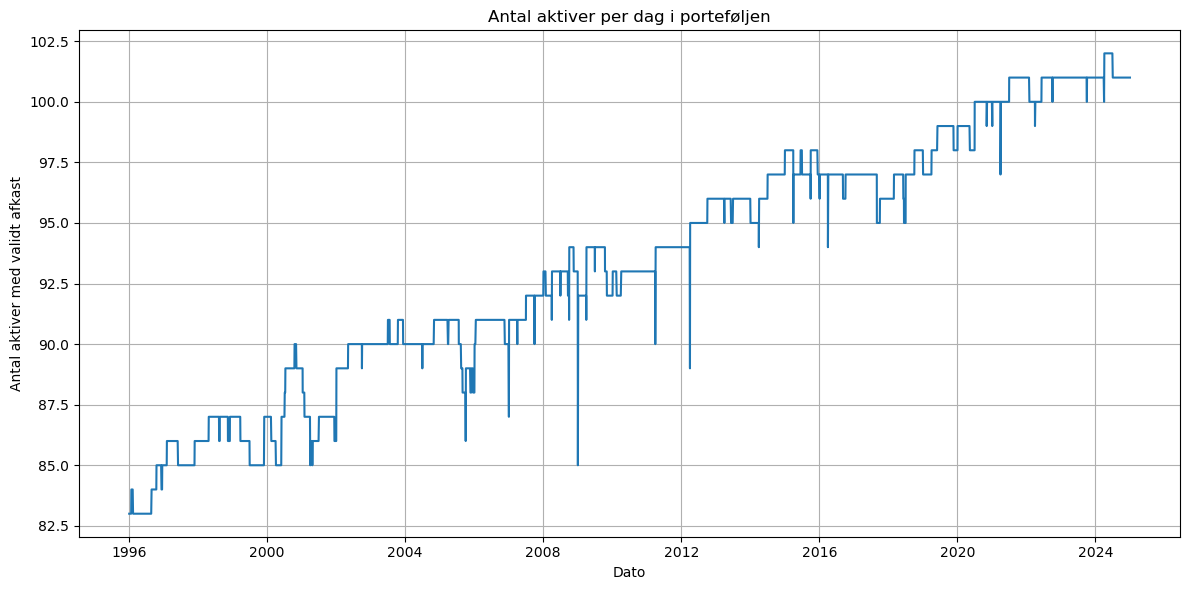

In [221]:
import matplotlib.pyplot as plt

# Tæl antal aktiver (ikke-NaN returns) per dag
assets_per_day = final_df.groupby("date")["return"].count()

# Udskriv mindste antal aktiver
print(f"Mindste antal aktiver på en dag: {assets_per_day.min()}")

# Plot antal aktiver over tid
plt.figure(figsize=(12,6))
plt.plot(assets_per_day.index, assets_per_day.values)
plt.xlabel("Dato")
plt.ylabel("Antal aktiver med validt afkast")
plt.title("Antal aktiver per dag i porteføljen")
plt.grid(True)
plt.tight_layout()
plt.show()


### calculate index returns

In [320]:
# Beregn vægtet afkast per dag
temp = final_df.copy()
temp["weighted_return"] = temp["weight"] * temp["return"]

# Summer vægtet afkast per dag → replikeret indeksafkast
index_returns_replicated = temp.groupby("date")["weighted_return"].sum().reset_index()
index_returns_replicated = index_returns_replicated.rename(columns={"weighted_return": "index_return_rep"})



In [321]:
# Træk de faktiske indeksafkast ud
index_returns_true = sum_df[sum_df['ticker'] == "OEX"][["date", "return"]].copy()
index_returns_true2 = sum_df[sum_df['ticker'] == "OEF"][["date", "return"]].copy()

# Giv en pænere kolonnenavn til return
index_returns_true = index_returns_true.rename(columns={"return": "index_return"})
index_returns_true2 = index_returns_true2.rename(columns={"return": "index_return2"})


In [345]:
# Merge de to tidsserier på dato
combined_returns = pd.merge(
    index_returns_replicated,
    index_returns_true,
    on="date",
    how="inner"  # kun behold datoer der findes i begge
)

# # tager oef med fra OM
# combined_returns = pd.merge(
#     combined_returns,
#     index_returns_true2,
#     on="date",
#     how="inner"  # kun behold datoer der findes i begge
# )

# # tager oef med fra CRSP
# combined_returns = pd.merge(
#     combined_returns,
#     crsp_data_oef,
#     on="date",
#     how="inner"  # kun behold datoer der findes i begge
# )

# Drop eventuelle NaN (bare for sikkerheds skyld)
combined_returns = combined_returns.dropna()

# Preview
print(combined_returns.head())


        date  index_return_rep  index_return
0 1996-01-04         -0.006564     -0.006243
1 1996-01-05         -0.002522      0.000322
2 1996-01-08          0.002696      0.003276
3 1996-01-09         -0.015589     -0.014025
4 1996-01-10         -0.016307     -0.019303


In [ ]:
# # remove big outliers dont run only for test

# threshold = 0.1
# combined_returns["diff"] = combined_returns["index_return_rep"] - combined_returns["index_return2"]
# mask_outliers = combined_returns["diff"].abs() > threshold
# combined_returns.loc[mask_outliers, "index_return2"] = combined_returns.loc[mask_outliers, "index_return_rep"]



In [ ]:
# # sammenligner oef data fra CRSP med OEF data fra OM
# combined_returns_oef = pd.merge(
#     index_returns_true2,
#     crsp_data_oef,
#     on="date",
#     how="inner"  # kun behold datoer der findes i begge
# )

# # Drop eventuelle NaN (bare for sikkerheds skyld)
# combined_returns_oef = combined_returns_oef.dropna()
# print(combined_returns_oef.head())

# import matplotlib.pyplot as plt
# import numpy as np

# # Beregn akkumulerede log-afkast for begge serier
# combined_returns_oef["log_cum_index_return2"] = np.log1p(combined_returns_oef["index_return2"]).cumsum()
# combined_returns_oef["log_cum_oef_return"] = np.log1p(combined_returns_oef["oef_return"]).cumsum()

# # Plot
# plt.figure(figsize=(12, 6))
# plt.plot(combined_returns_oef["date"], combined_returns_oef["log_cum_index_return2"], label="Index Return2 (tidligere OEF)", linestyle="--")
# plt.plot(combined_returns_oef["date"], combined_returns_oef["log_cum_oef_return"], label="OEF fra CRSP", linestyle="-")
# plt.title("Akkumuleret Log-Afkast: Index_return2 vs. OEF fra CRSP")
# plt.xlabel("Dato")
# plt.ylabel("Akkumuleret log-afkast")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


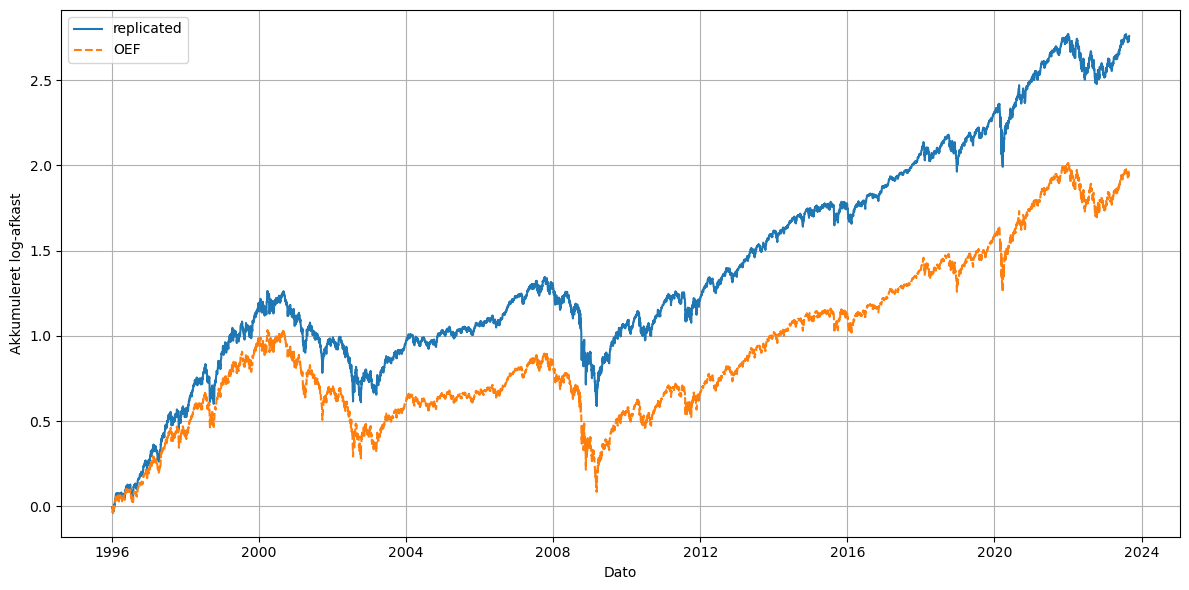

In [346]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Beregn akkumulerede log-afkast
combined_returns["log_cum_replicated"] = np.log1p(combined_returns["index_return_rep"]).cumsum()
combined_returns["log_cum_true"] = np.log1p(combined_returns["index_return"]).cumsum()

# 2. Plot
plt.figure(figsize=(12,6))
plt.plot(combined_returns["date"], combined_returns["log_cum_replicated"], label="replicated", linestyle="-")
plt.plot(combined_returns["date"], combined_returns["log_cum_true"], label="OEF", linestyle="--")
# plt.title("Akkumuleret Log-Afkast: Replikeret vs. Faktisk Indeks")
plt.xlabel("Dato")
plt.ylabel("Akkumuleret log-afkast")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


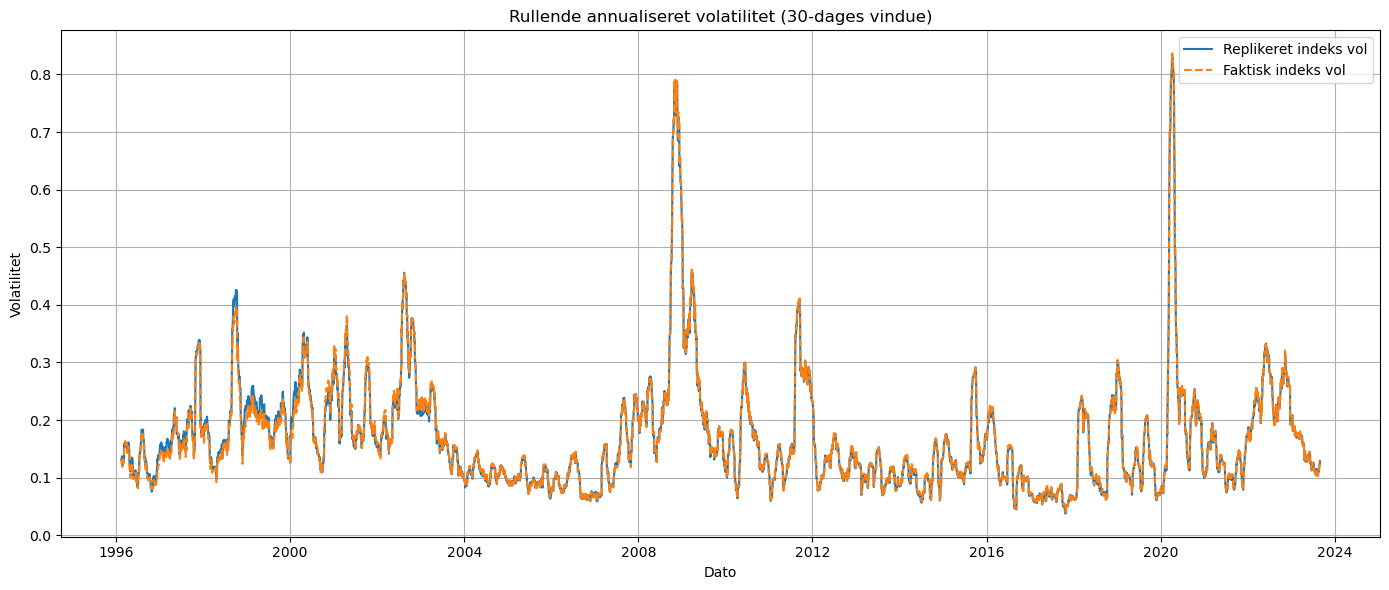

In [347]:
import matplotlib.pyplot as plt
import pandas as pd

# Beregn rullende annualiseret volatilitet
rolling_window = 30
vol_replikeret = combined_returns["index_return_rep"].rolling(rolling_window).std() * (252**0.5)
vol_faktisk = combined_returns["index_return"].rolling(rolling_window).std() * (252**0.5)

# Plot direkte med dato som x-akse
plt.figure(figsize=(14, 6))
plt.plot(combined_returns["date"], vol_replikeret, label="Replikeret indeks vol")
plt.plot(combined_returns["date"], vol_faktisk, label="Faktisk indeks vol", linestyle="--")

plt.title("Rullende annualiseret volatilitet (30-dages vindue)")
plt.xlabel("Dato")
plt.ylabel("Volatilitet")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [349]:
# import numpy as np
# import matplotlib.pyplot as plt

# # 👉 Vælg periode (tilpas disse datoer)
# start_date = "2010-01-01"
# end_date = "2024-01-01"

# # 1. Filtrér på perioden
# subset = combined_returns[
#     (combined_returns["date"] >= start_date) & 
#     (combined_returns["date"] <= end_date)
# ].copy()

# # 2. Genberegn log-afkast fra nul i valgt periode
# subset["log_cum_replicated"] = np.log1p(subset["index_return_rep"]).cumsum()
# subset["log_cum_true"] = np.log1p(subset["index_return2"]).cumsum()

# # 3. Plot
# plt.figure(figsize=(12,6))
# plt.plot(subset["date"], subset["log_cum_replicated"], label="Replikeret Indeks", linestyle="-")
# plt.plot(subset["date"], subset["log_cum_true"], label="Faktisk Indeks", linestyle="--")
# plt.title(f"Akkumuleret Log-Afkast ({start_date} til {end_date})")
# plt.xlabel("Dato")
# plt.ylabel("Akkumuleret log-afkast")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [350]:
# import numpy as np
# import matplotlib.pyplot as plt

# # 1. Beregn forskellen i daglige afkast
# combined_returns["diff"] = combined_returns["index_return_rep"] - combined_returns["index_return2"]

# # 2. Plot histogram
# plt.figure(figsize=(10,6))
# plt.hist(combined_returns["diff"], bins=100, edgecolor="black")
# plt.title("Histogram over forskellen: Replikeret minus Faktisk afkast")
# plt.xlabel("Forskel (dagligt afkast)")
# plt.ylabel("Antal dage")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

# # 3. (valgfrit) Udskriv statistik
# print(combined_returns["diff"].describe())


In [351]:
# # Find de rækker hvor forskellen er stor
# large_diff = combined_returns[combined_returns["diff"].abs() > 0.025]

# # Udskriv datoer + info
# print(large_diff[["date","index_return", "index_return_rep", "index_return2", "diff"]])


In [359]:
import pandas as pd

# Sørg for datetime-format
oex_constituents_long["date"] = pd.to_datetime(oex_constituents_long["date"])
final_df["date"] = pd.to_datetime(final_df["date"])

# Find alle tickere aktive før 2004
tickers_before_2004 = oex_constituents_long.loc[
    oex_constituents_long["date"] < "2004-01-01", "ticker"
].dropna().unique()

# Find tickere i final_df (CRSP filtreret)
tickers_in_final_df = final_df["ticker"].dropna().unique()

# Kun tickere der findes begge steder
valid_tickers = sorted(set(tickers_before_2004) & set(tickers_in_final_df))

# Lav klar til kopiering med dobbelte anførselstegn
tickers_string = ", ".join(f'"{ticker}"' for ticker in valid_tickers)

# Print resultat
print(tickers_string)


"AA", "AEP", "AES", "AIG", "ALL", "AMGN", "ATI", "AVP", "AXP", "BA", "BAC", "BAX", "BDK", "BHI", "BMY", "BNI", "BUD", "C", "CGP", "CI", "CL", "CPB", "CSC", "CSCO", "DAL", "DD", "DIS", "DOW", "EMC", "ENE", "EP", "ETR", "EXC", "F", "FDX", "G", "GBLX", "GD", "GE", "GM", "GS", "HAL", "HCA", "HD", "HET", "HIG", "HNZ", "HON", "HPQ", "HSH", "IBM", "INTC", "IP", "JCI", "JNJ", "JPM", "KO", "LEH", "MAY", "MCD", "MDT", "MER", "MMM", "MO", "MRK", "MS", "MSFT", "NSC", "NSM", "NT", "NXTL", "OMX", "ONE", "ORCL", "PARA", "PEP", "PFE", "PG", "PNU", "RAL", "ROK", "RSH", "RTN", "RTX", "S", "SLB", "SO", "T", "TOY", "TWX", "TXN", "UBAN", "UIS", "USB", "VZ", "WFC", "WMB", "WMT", "WY", "XOM", "XRX"


# Section 3.A 

### figure 1

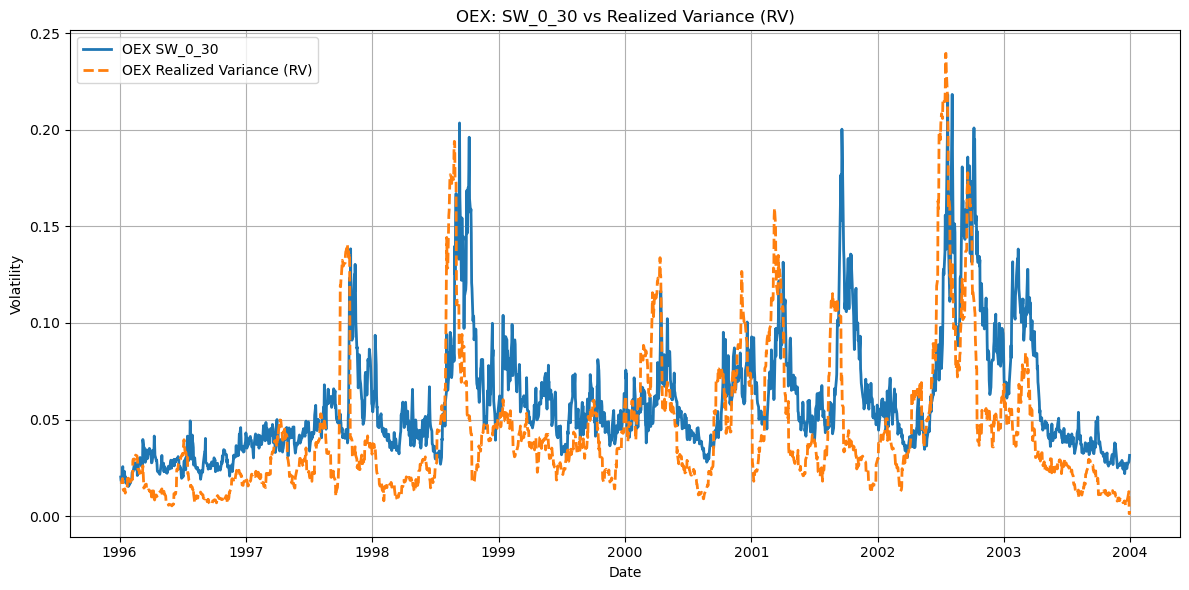

In [352]:
import matplotlib.pyplot as plt

# Filtrér for OEX
oex_data = df_orpy[df_orpy["ticker"] == "OEX"]

# Plot SW og Realized Variance (RV)
plt.figure(figsize=(12, 6))
plt.plot(oex_data["date"], oex_data["SW_0_30"], label="OEX SW_0_30", linewidth=2)
plt.plot(oex_data["date"], oex_data["RV"], label="OEX Realized Variance (RV)", linewidth=2, linestyle='--')
plt.title("OEX: SW_0_30 vs Realized Variance (RV)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### figure 2

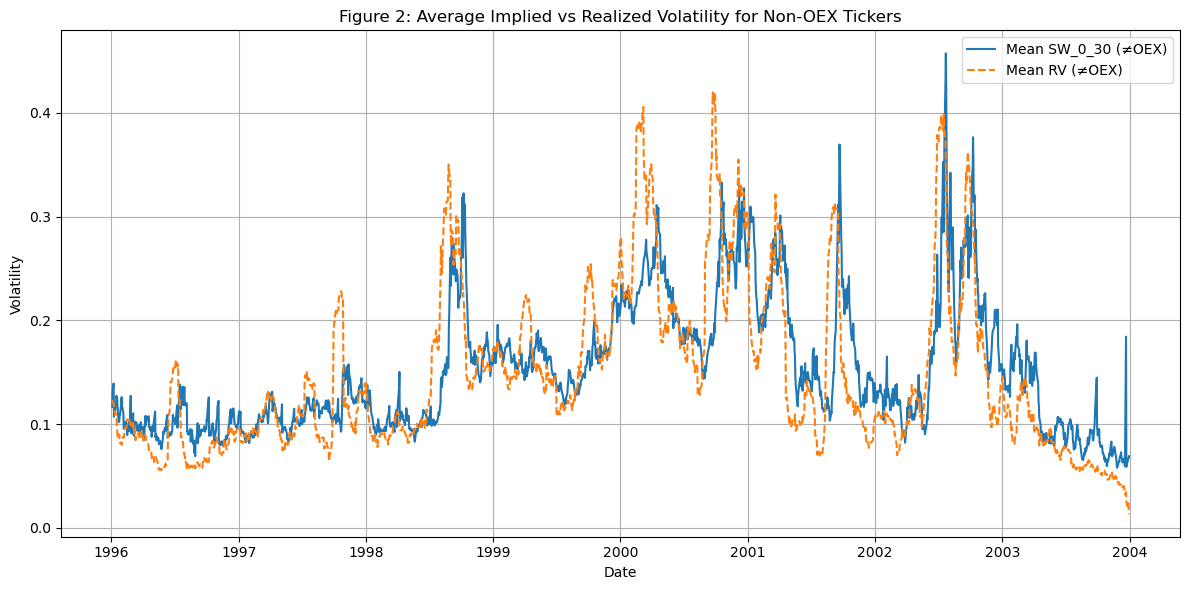

In [353]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrér alle ikke-OEX tickers
non_oex = df_orpy[df_orpy["ticker"] != "OEX"]

# Gruppér på dato og regn ligevægtet gennemsnit
avg_sw = non_oex.groupby("date")["SW_0_30"].mean()
avg_rv = non_oex.groupby("date")["RV"].mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(avg_sw.index, avg_sw.values, label="Mean SW_0_30 (≠OEX)")
plt.plot(avg_rv.index, avg_rv.values, label="Mean RV (≠OEX)", linestyle="--")
plt.title("Figure 2: Average Implied vs Realized Volatility for Non-OEX Tickers")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### vrp average pr ticker

c:\Users\axell\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


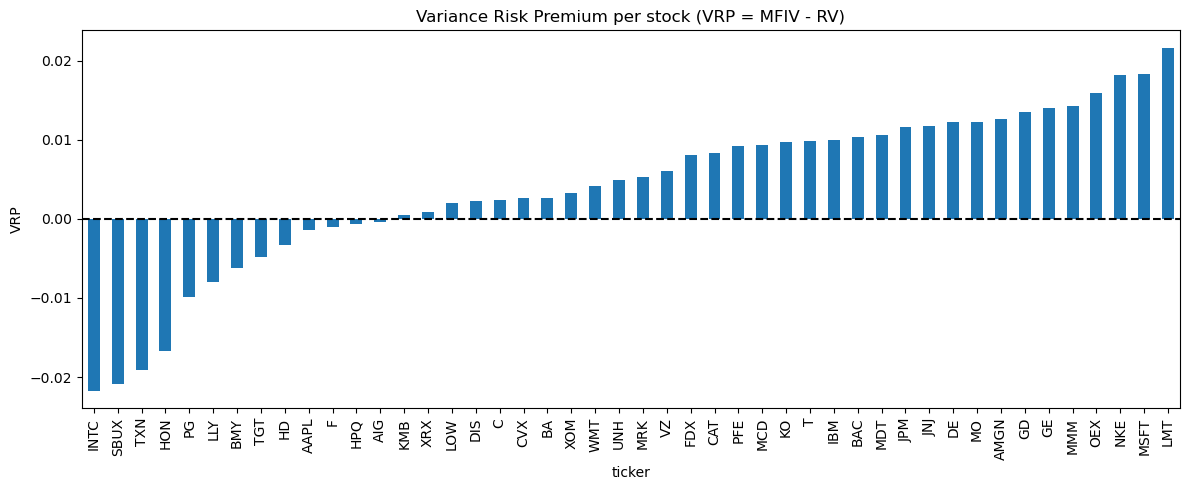

In [126]:
# Lav kopi med relevante kolonner
df_vrp = df_orpy[["ticker", "date", "SW_0_30", "RV"]].copy()

# Beregn MFIV, VRP og log-ratio
df_vrp["MFIV"] = df_vrp["SW_0_30"]
df_vrp["VRP"] = df_vrp["MFIV"] - df_vrp["RV"]
df_vrp["log_RV_MFIV"] = np.log(df_vrp["RV"] / df_vrp["MFIV"])

# Gennemsnit pr. ticker
vrp_per_stock = df_vrp.groupby("ticker")[["VRP", "log_RV_MFIV"]].mean().sort_values("VRP")

# (Valgfrit) plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
vrp_per_stock["VRP"].plot(kind="bar")
plt.axhline(0, color="black", linestyle="--")
plt.title("Variance Risk Premium per stock (VRP = MFIV - RV)")
plt.ylabel("VRP")
plt.tight_layout()
plt.show()


### table 1 (data to table 1)

In [127]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

# Antag df_orpy eksisterer og har kolonnerne: 'ticker', 'date', 'SW_0_30', 'RV'
# 1. Beregn VRP
df_vrp = df_orpy.copy()
df_vrp["VRP"] = df_vrp["SW_0_30"] - df_vrp["RV"]

# 2. T-test per ticker med Newey-West standard errors
result_rows = []

for ticker, group in df_vrp.groupby("ticker"):
    group = group.dropna(subset=["VRP"])

    if group.empty or len(group) < 30 or group["VRP"].isna().all():
        continue

    X = add_constant(pd.DataFrame(index=group.index))  
    y = group["VRP"].values

    model = OLS(y, X).fit(cov_type='HAC', cov_kwds={'maxlags': 22})  # Newey-West standard errors

    t_stat = model.tvalues.iloc[0]
    p_value = model.pvalues.iloc[0]

    mean_vrp = group["VRP"].mean()

    result_rows.append({
        "ticker": ticker,
        "mean_vrp": mean_vrp,
        "t_stat": t_stat,
        "p_value": p_value,
        "n_obs": len(group)
    })

# 3. Konstruér resultater som DataFrame og sorter
df_vrp_test = pd.DataFrame(result_rows)
df_vrp_test = df_vrp_test.sort_values("p_value").reset_index(drop=True)

# Print resultater
print(df_vrp_test)


   ticker  mean_vrp    t_stat       p_value  n_obs
0     OEX  0.015946  6.016974  1.777076e-09   2013
1     MMM  0.014239  2.927283  3.419371e-03   1859
2      GE  0.014030  2.782373  5.396301e-03   1903
3     LMT  0.021643  2.577821  9.942538e-03   1621
4      GD  0.013434  2.311066  2.082919e-02   1529
5    MSFT  0.018254  2.301221  2.137915e-02   1957
6     JNJ  0.011767  2.160623  3.072446e-02   1746
7     NKE  0.018112  1.802037  7.153955e-02   1950
8      KO  0.009739  1.791551  7.320498e-02   1700
9     MDT  0.010544  1.765097  7.754741e-02   1896
10    BAC  0.010366  1.733882  8.293899e-02   1913
11    FDX  0.008027  1.593861  1.109671e-01   1775
12    MCD  0.009355  1.560947  1.185362e-01   1519
13     MO  0.012245  1.486936  1.370317e-01   1945
14    PFE  0.009223  1.439905  1.498943e-01   1900
15   INTC -0.021750 -1.434489  1.514328e-01   1966
16    CAT  0.008303  1.409931  1.585600e-01   1768
17    IBM  0.009985  1.365284  1.721639e-01   2008
18      T  0.009779  1.340745  

### table 1

In [128]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

# Beregn VRP
df_vrp = df_orpy.copy()
df_vrp["VRP"] = df_vrp["SW_0_30"] - df_vrp["RV"]

# Split: OEX vs øvrige
df_oex = df_vrp[df_vrp["ticker"] == "OEX"].dropna(subset=["SW_0_30", "RV"])
df_ind = df_vrp[df_vrp["ticker"] != "OEX"].dropna(subset=["SW_0_30", "RV"])

# Gennemsnit
mean_rv_oex = df_oex["RV"].mean()
mean_sw_oex = df_oex["SW_0_30"].mean()
mean_rv_ind = df_ind["RV"].mean()
mean_sw_ind = df_ind["SW_0_30"].mean()

# sqrt forskelle
sqrt_diff_oex = np.sqrt(mean_rv_oex) - np.sqrt(mean_sw_oex)
sqrt_diff_ind = np.sqrt(mean_rv_ind) - np.sqrt(mean_sw_ind)

# OLS tests med Newey-West
X_oex = add_constant(np.ones(len(df_oex)))
y_oex = df_oex["VRP"]
model_oex = OLS(y_oex, X_oex).fit(cov_type="HAC", cov_kwds={"maxlags": 22})
p_vrp_eq_0_oex = model_oex.pvalues.iloc[0]

ratios_oex = df_oex["RV"] / df_oex["SW_0_30"]
ratios_oex = ratios_oex.replace([np.inf, 0], np.nan).dropna()
Xr_oex = add_constant(np.ones(len(ratios_oex)))
model_ratio_oex = OLS(ratios_oex - 1, Xr_oex).fit(cov_type="HAC", cov_kwds={"maxlags": 22})
p_ratio_eq_1_oex = model_ratio_oex.pvalues.iloc[0]

X_ind = add_constant(np.ones(len(df_ind)))
y_ind = df_ind["VRP"]
model_ind = OLS(y_ind, X_ind).fit(cov_type="HAC", cov_kwds={"maxlags": 22})
p_vrp_eq_0_ind = model_ind.pvalues.iloc[0]

ratios_ind = df_ind["RV"] / df_ind["SW_0_30"]
ratios_ind = ratios_ind.replace([np.inf, 0], np.nan).dropna()
Xr_ind = add_constant(np.ones(len(ratios_ind)))
model_ratio_ind = OLS(ratios_ind - 1, Xr_ind).fit(cov_type="HAC", cov_kwds={"maxlags": 22})
p_ratio_eq_1_ind = model_ratio_ind.pvalues.iloc[0]

# Samlet tabel
summary_table = pd.DataFrame({
    "Category": [
        "Mean Realized Variance",
        "Mean Implied Variance (SW)",
        "Difference √RV − √SW",
        "p value for H₀: RV - SW = 0",
        "p value for H₀: RV / SW - 1 = 0"
    ],
    "Index Options (OEX)": [
        round(np.sqrt(mean_rv_oex), 6),
        round(np.sqrt(mean_sw_oex), 6),
        round(sqrt_diff_oex, 6),
        round(p_vrp_eq_0_oex, 6),
        round(p_ratio_eq_1_oex, 6)
    ],
    "Individual Options": [
        round(mean_rv_ind, 6),
        round(mean_sw_ind, 6),
        round(sqrt_diff_ind, 6),
        round(p_vrp_eq_0_ind, 6),
        round(p_ratio_eq_1_ind, 6)
    ]
})

# Udskriv tabel
print("\nSummary Table (SW terminologi):\n")
print(summary_table.to_string(index=False, col_space=35))


# Antag df_vrp_test eksisterer fra tidligere (output fra OLS tests per ticker)

# Filtrér kun individuelle aktier (dvs. ekskluder "OEX")
df_vrp_individuals = df_vrp_test[df_vrp_test["ticker"] != "OEX"]

# Antal pr kategori
summary_test_counts = pd.DataFrame({
    "Hypothesis": [
        "H₀: RV - SW = 0 not rejected",
        "H₀: RV - SW ≤ 0 rejected",
        "H₀: RV - SW ≥ 0 rejected"
    ],
    "# Ind. Stocks": [
        (df_vrp_individuals["p_value"] > 0.05).sum(),
        (df_vrp_individuals["t_stat"] > 0).sum(),
        (df_vrp_individuals["t_stat"] < 0).sum()
    ]
})

# Udskriv
print("\nIndividual Tests of Variance Risk Premia:\n")
print(summary_test_counts.to_string(index=False, col_space=40))





Summary Table (SW terminologi):

                           Category                 Index Options (OEX)                  Individual Options
             Mean Realized Variance                            0.208383                            0.152782
         Mean Implied Variance (SW)                            0.243659                            0.156450
               Difference √RV − √SW                           -0.035276                           -0.004664
        p value for H₀: RV - SW = 0                            0.000000                            0.000216
    p value for H₀: RV / SW - 1 = 0                            0.000000                            0.027315

Individual Tests of Variance Risk Premia:

                              Hypothesis                            # Ind. Stocks
            H₀: RV - SW = 0 not rejected                                       39
                H₀: RV - SW ≤ 0 rejected                                       32
                H₀: RV - SW 

# Section 3.B

In [129]:
sum_df['CF_30_SW_day'] = sum_df['CF_30_SW_day_v2']
sum_df["r_30_SW_day"] = sum_df["CF_30_SW_day"] / sum_df["SW_m1_29"].shift(1).rolling(window=21).mean()

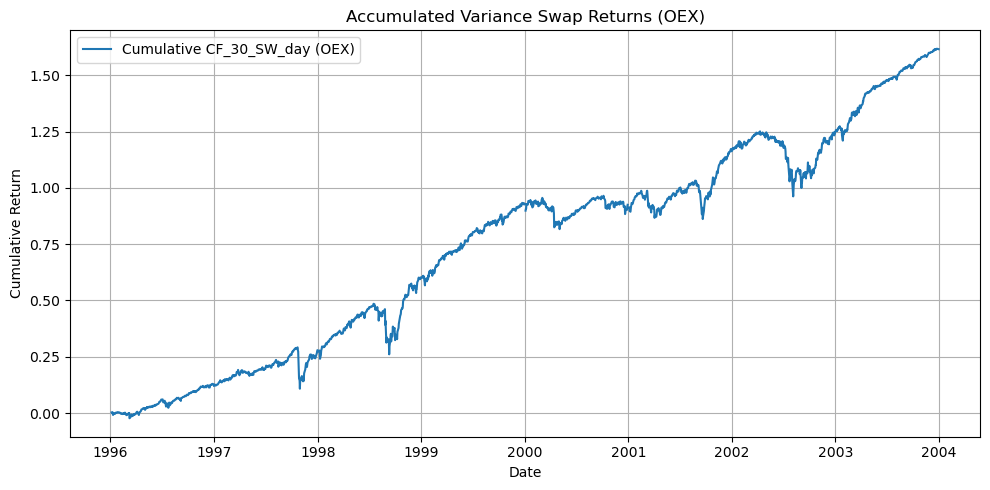

In [130]:
import matplotlib.pyplot as plt

# Filtrér for OEX
oex_df = sum_df[sum_df["ticker"] == "OEX"].copy()

# Sørg for sortering efter dato
oex_df = oex_df.sort_values("date")

# Beregn akkumuleret sum
oex_df["cum_CF_30_SW_day"] = -oex_df["CF_30_SW_day"].cumsum()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(oex_df["date"], oex_df["cum_CF_30_SW_day"], label="Cumulative CF_30_SW_day (OEX)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.title("Accumulated Variance Swap Returns (OEX)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [131]:
# Antag: sum_df har kolonnerne 'ticker', 'date', 'r_30_SW_day'
# Step 1: Fjern OEX og NA'er
vrp_data = sum_df[sum_df["ticker"] != "OEX"].copy()
vrp_data = vrp_data.dropna(subset=["r_30_SW_day"])

# Step 2: Beregn daglig VRP faktor som ligevægtet gennemsnit
vrp_factor = vrp_data.groupby("date")["r_30_SW_day"].mean().reset_index()
vrp_factor.rename(columns={"r_30_SW_day": "VRP_factor_eqw"}, inplace=True)

# Preview
print(vrp_factor.head())


        date  VRP_factor_eqw
0 1996-02-15       -0.130664
1 1996-03-06        0.025567
2 1996-03-07       -0.032031
3 1996-03-08        0.243584
4 1996-03-11       -0.028081


# Section 4.A trading strategy

### create rollnig correlation estimate

In [132]:
import pandas as pd
import numpy as np

sum_df_filtered = sum_df[sum_df['ticker'] != 'OEX'].copy()
sum_df_filtered.loc[:, 'date'] = pd.to_datetime(sum_df_filtered['date'])
pivot_df = sum_df_filtered.pivot(index='date', columns='ticker', values='return')
pivot_df = pivot_df.sort_index()

rolling_avg_corr = []
window = 30

for i in range(window, len(pivot_df)):
    window_returns = pivot_df.iloc[i - window:i]
    corr_matrix = window_returns.corr()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    avg_corr = upper_triangle.stack().mean()
    rolling_avg_corr.append((pivot_df.index[i], avg_corr))

avg_corr_df = pd.DataFrame(rolling_avg_corr, columns=['date', 'avg_correlation'])


# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(avg_corr_df['date'], avg_corr_df['avg_correlation'])
# plt.title('30-dages gennemsnitlig korrelation over tid')
# plt.xlabel('Dato')
# plt.ylabel('Gennemsnitlig korrelation')
# plt.grid(True)
# plt.tight_layout()
# plt.show()



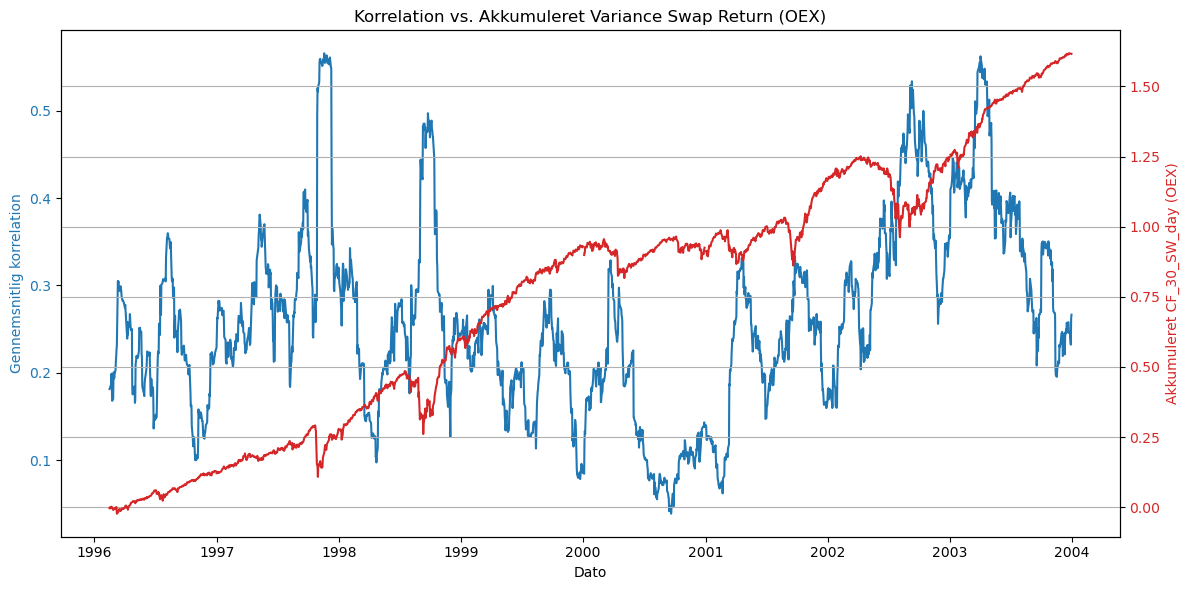

In [133]:
import matplotlib.pyplot as plt

# Filtrér for OEX og forbered data
oex_df = sum_df[sum_df["ticker"] == "OEX"].copy()
oex_df = oex_df.sort_values("date")
oex_df["cum_CF_30_SW_day"] = -oex_df["CF_30_SW_day"].cumsum()

# Merge OEX og korrelationer på dato
merged_df = pd.merge(avg_corr_df, oex_df[["date", "cum_CF_30_SW_day"]], on="date", how="inner")

# Plot med to akser
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel("Dato")
ax1.set_ylabel("Gennemsnitlig korrelation", color=color)
ax1.plot(merged_df["date"], merged_df["avg_correlation"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Akkumuleret CF_30_SW_day (OEX)", color=color)
ax2.plot(merged_df["date"], merged_df["cum_CF_30_SW_day"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Korrelation vs. Akkumuleret Variance Swap Return (OEX)")
fig.tight_layout()
plt.grid(True)
plt.show()


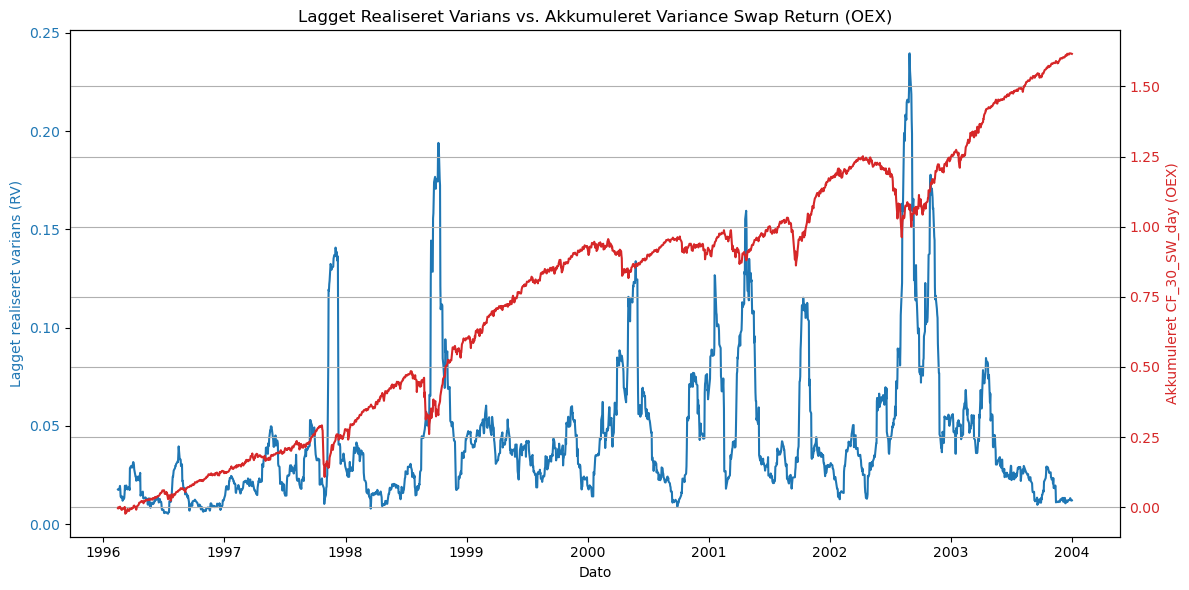

In [134]:
import matplotlib.pyplot as plt

# Filtrér for OEX og sorter
oex_df = sum_df[sum_df["ticker"] == "OEX"].copy()
oex_df = oex_df.sort_values("date")

# Lag realiseret varians 30 dage bagud
oex_df["RV_lagged"] = oex_df["RV"].shift(30)

# Beregn akkumuleret variance swap cashflow
oex_df["cum_CF_30_SW_day"] = -oex_df["CF_30_SW_day"].cumsum()

# Drop NA (som kommer fra shift)
oex_df = oex_df.dropna(subset=["RV_lagged", "cum_CF_30_SW_day"])

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel("Dato")
ax1.set_ylabel("Lagget realiseret varians (RV)", color=color)
ax1.plot(oex_df["date"], oex_df["RV_lagged"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Akkumuleret CF_30_SW_day (OEX)", color=color)
ax2.plot(oex_df["date"], oex_df["cum_CF_30_SW_day"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Lagget Realiseret Varians vs. Akkumuleret Variance Swap Return (OEX)")
plt.grid(True)
fig.tight_layout()
plt.show()


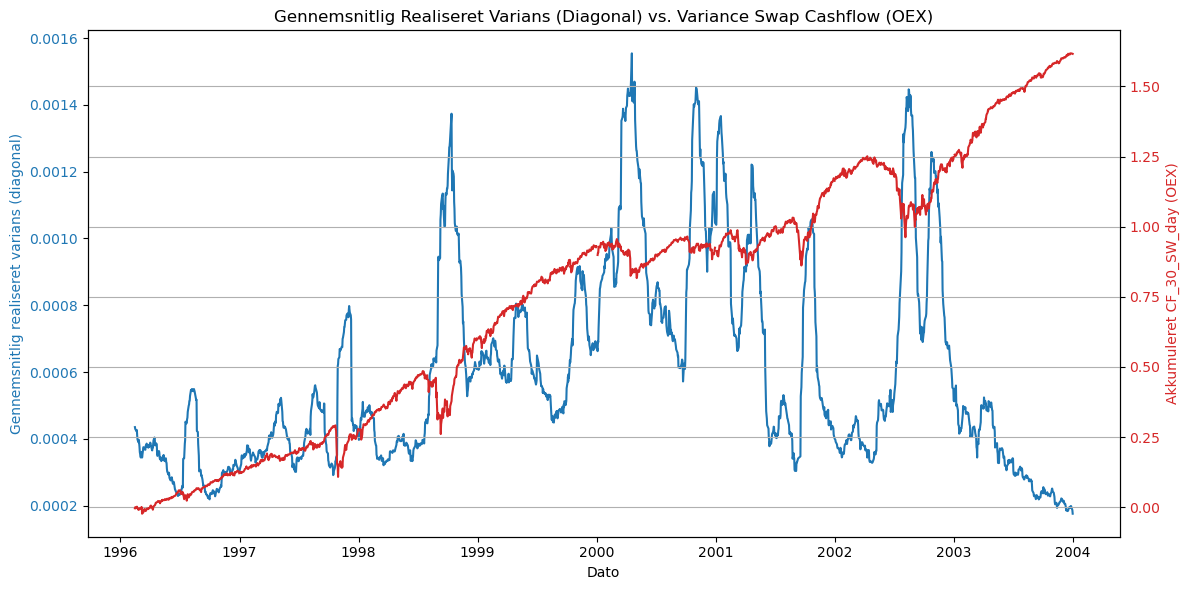

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filtrer OEX fra
returns_df = sum_df[sum_df["ticker"] != "OEX"].copy()
returns_df['date'] = pd.to_datetime(returns_df['date'])

# Pivotér til (dato × ticker) matrix
pivot_df = returns_df.pivot(index='date', columns='ticker', values='return')
pivot_df = pivot_df.sort_index()

# Beregn rullende gennemsnitlig diagonal (varians)
window = 30
avg_diag_variance = []

for i in range(window, len(pivot_df)):
    window_returns = pivot_df.iloc[i - window:i]
    cov_matrix = window_returns.cov()
    diag_var = np.diag(cov_matrix)
    avg_var = np.nanmean(diag_var)
    avg_diag_variance.append((pivot_df.index[i], avg_var))

avg_var_df = pd.DataFrame(avg_diag_variance, columns=['date', 'avg_variance'])

# Forbered OEX cashflow
oex_df = sum_df[sum_df["ticker"] == "OEX"].copy()
oex_df = oex_df.sort_values("date")
oex_df["cum_CF_30_SW_day"] = -oex_df["CF_30_SW_day"].cumsum()

# Merge begge tidsserier
merged_df = pd.merge(avg_var_df, oex_df[["date", "cum_CF_30_SW_day"]], on="date", how="inner")

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel("Dato")
ax1.set_ylabel("Gennemsnitlig realiseret varians (diagonal)", color=color)
ax1.plot(merged_df["date"], merged_df["avg_variance"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel("Akkumuleret CF_30_SW_day (OEX)", color=color)
ax2.plot(merged_df["date"], merged_df["cum_CF_30_SW_day"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Gennemsnitlig Realiseret Varians (Diagonal) vs. Variance Swap Cashflow (OEX)")
plt.grid(True)
fig.tight_layout()
plt.show()


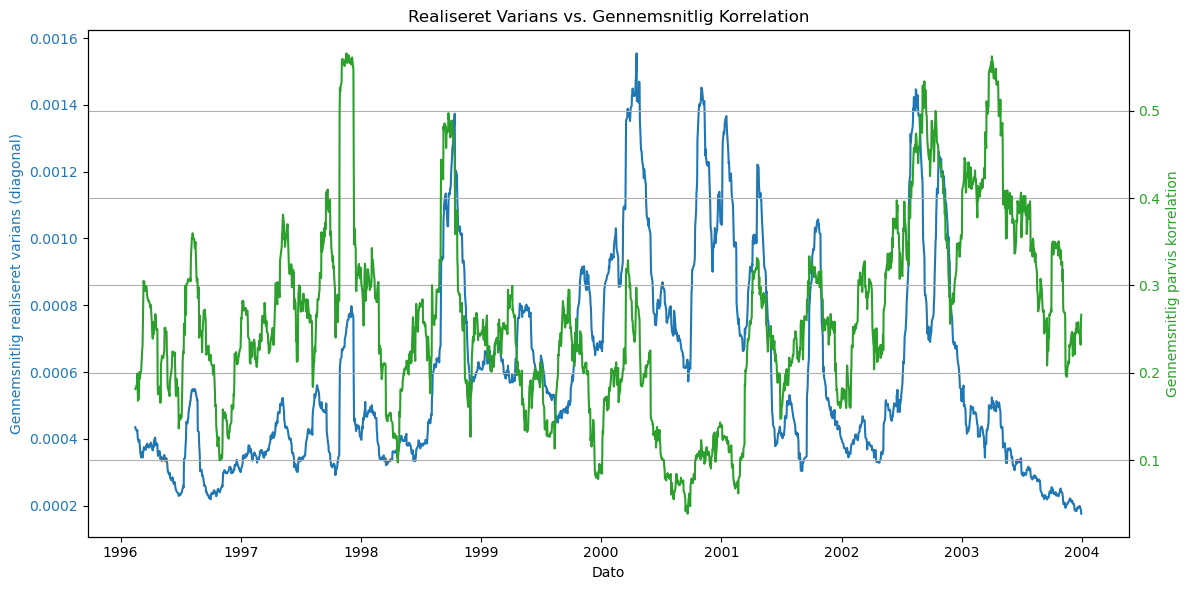

In [138]:
import matplotlib.pyplot as plt

# Merge realiseret varians og korrelation på dato
merged_metrics = pd.merge(avg_var_df, avg_corr_df, on='date', how='inner')

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel("Dato")
ax1.set_ylabel("Gennemsnitlig realiseret varians (diagonal)", color=color)
ax1.plot(merged_metrics["date"], merged_metrics["avg_variance"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel("Gennemsnitlig parvis korrelation", color=color)
ax2.plot(merged_metrics["date"], merged_metrics["avg_correlation"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Realiseret Varians vs. Gennemsnitlig Korrelation")
plt.grid(True)
fig.tight_layout()
plt.show()


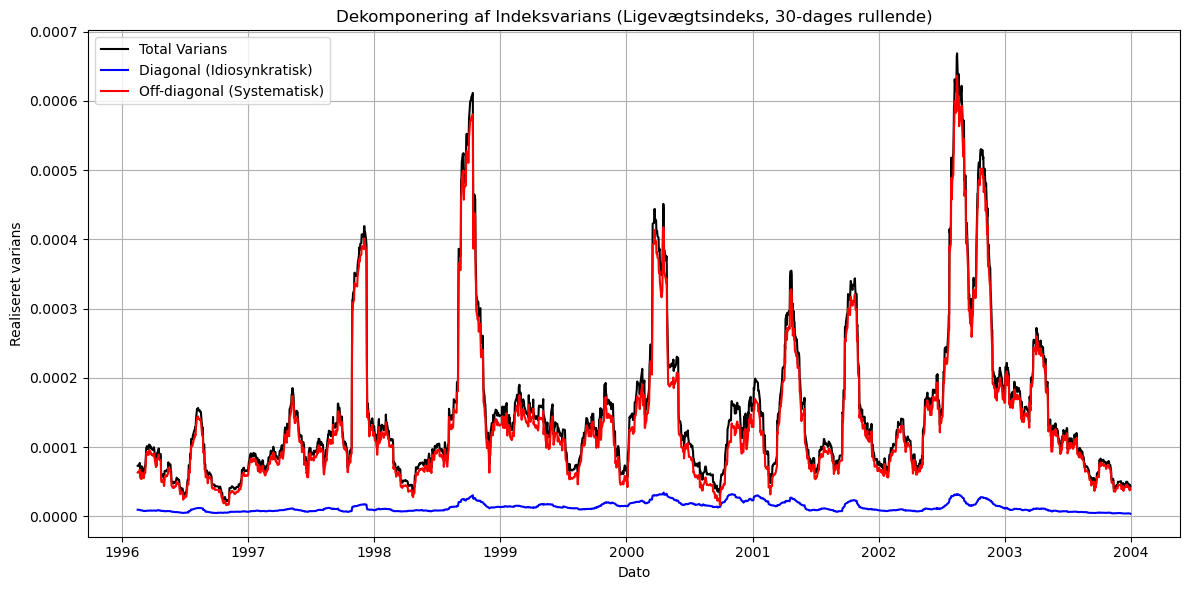

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Forbered data (ekskluder OEX)
returns_df = sum_df[sum_df["ticker"] != "OEX"].copy()
returns_df['date'] = pd.to_datetime(returns_df['date'])
pivot_df = returns_df.pivot(index='date', columns='ticker', values='return')
pivot_df = pivot_df.sort_index()

# Parametre
window = 30
decomp_data = []

# Loop over rullende vinduer
for i in range(window, len(pivot_df)):
    window_returns = pivot_df.iloc[i - window:i]
    cov_matrix = window_returns.cov()
    
    # Antal aktier i dette vindue (kan variere lidt pga. NaNs)
    tickers_in_window = cov_matrix.columns
    N = len(tickers_in_window)
    if N < 2:
        continue  # skip hvis for få data

    # Ligevægtsvægte
    w = np.ones(N) / N
    w_matrix = np.outer(w, w)

    # Total indeksvarians
    total_variance = np.sum(w_matrix * cov_matrix.values)

    # Diagonalbidrag (idiosynkratisk)
    diag = np.diag(cov_matrix.values)
    diag_variance = np.sum((w ** 2) * diag)

    # Off-diagonalbidrag
    off_diag_variance = total_variance - diag_variance

    # Gem resultat
    decomp_data.append((pivot_df.index[i], total_variance, diag_variance, off_diag_variance))

# Konverter til DataFrame
decomp_df = pd.DataFrame(decomp_data, columns=["date", "total", "diagonal", "off_diagonal"])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(decomp_df["date"], decomp_df["total"], label="Total Varians", color="black")
plt.plot(decomp_df["date"], decomp_df["diagonal"], label="Diagonal (Idiosynkratisk)", color="blue")
plt.plot(decomp_df["date"], decomp_df["off_diagonal"], label="Off-diagonal (Systematisk)", color="red")
plt.title("Dekomponering af Indeksvarians (Ligevægtsindeks, 30-dages rullende)")
plt.xlabel("Dato")
plt.ylabel("Realiseret varians")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


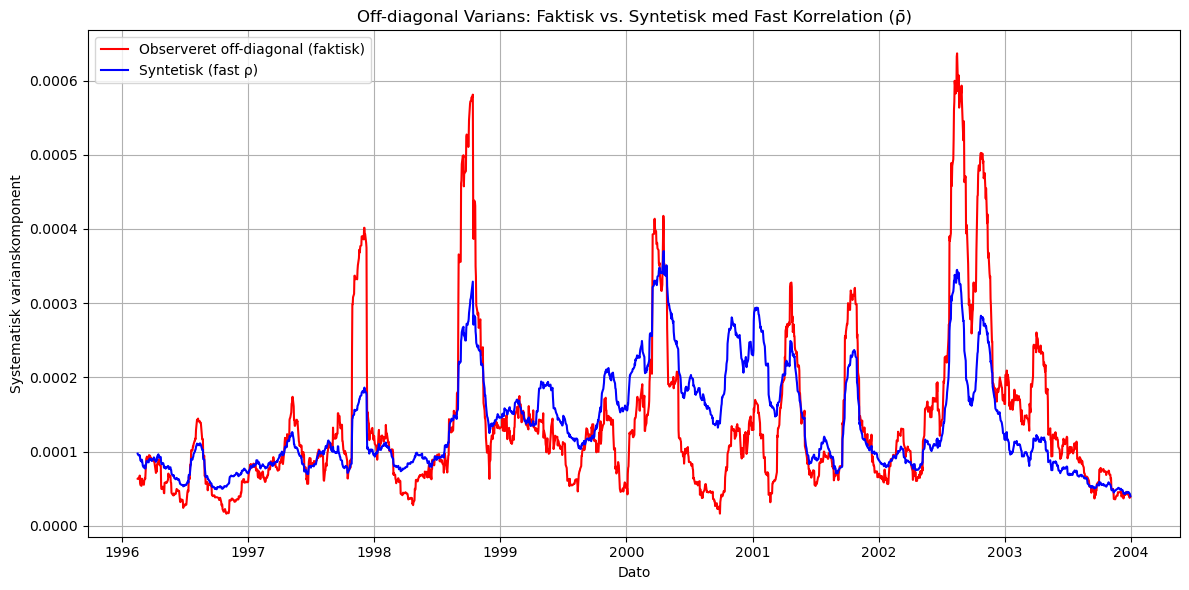

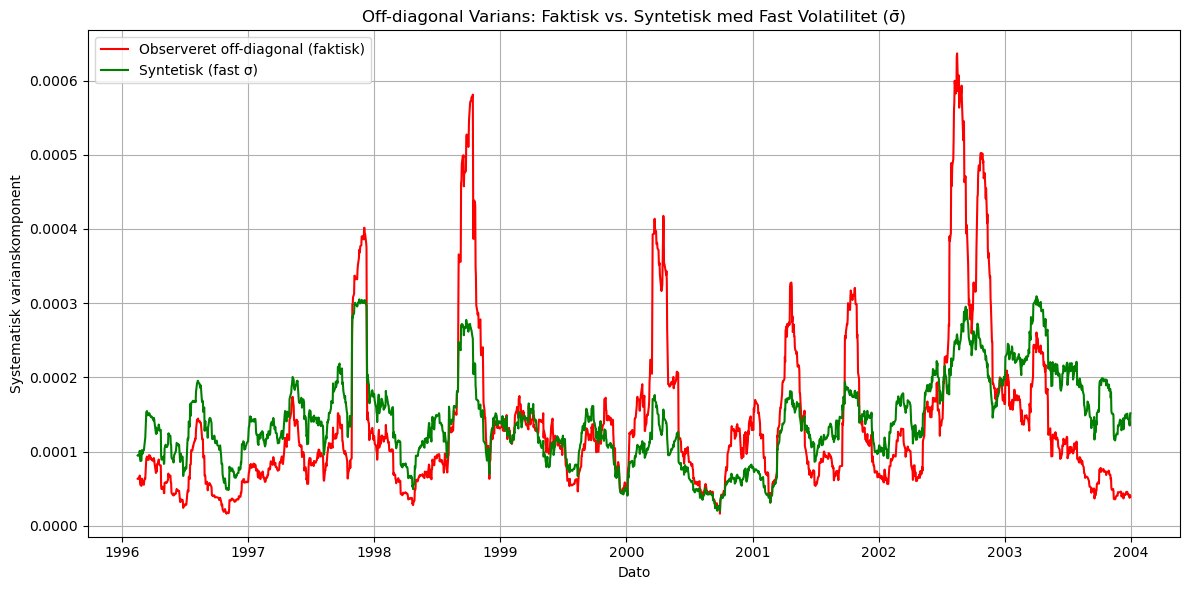

In [149]:
# Vælg om vi vil skalere syntetiske resultater
scale = False  # Sæt til True hvis du vil matche niveauer

# --------- Fast korrelation ---------
avg_rho = avg_corr_df["avg_correlation"].mean()
synthetic_off = []

for i in range(window, len(pivot_df)):
    window_returns = pivot_df.iloc[i - window:i]
    cov_matrix = window_returns.cov()

    tickers = cov_matrix.columns
    N = len(tickers)
    if N < 2:
        continue

    sigmas = np.sqrt(np.diag(cov_matrix.values))
    rho_matrix = np.full((N, N), avg_rho)
    np.fill_diagonal(rho_matrix, 0)
    sigma_outer = np.outer(sigmas, sigmas)
    synthetic_cov_off = rho_matrix * sigma_outer

    w = np.ones(N) / N
    w_matrix = np.outer(w, w)
    off_diag_mask = ~np.eye(N, dtype=bool)
    weighted_synthetic_off = synthetic_cov_off * w_matrix * off_diag_mask

    synthetic_off_value = np.sum(weighted_synthetic_off)
    synthetic_off.append((pivot_df.index[i], synthetic_off_value))

synthetic_off_df = pd.DataFrame(synthetic_off, columns=["date", "synthetic_off"])
compare_df = pd.merge(decomp_df[["date", "off_diagonal"]], synthetic_off_df, on="date", how="inner")

if scale:
    scaling_factor = (compare_df["off_diagonal"] / compare_df["synthetic_off"]).mean()
    compare_df["synthetic_plot"] = compare_df["synthetic_off"] * scaling_factor
else:
    compare_df["synthetic_plot"] = compare_df["synthetic_off"]

plt.figure(figsize=(12, 6))
plt.plot(compare_df["date"], compare_df["off_diagonal"], label="Observeret off-diagonal (faktisk)", color="red")
plt.plot(compare_df["date"], compare_df["synthetic_plot"], label="Syntetisk (fast ρ)", color="blue")
plt.title("Off-diagonal Varians: Faktisk vs. Syntetisk med Fast Korrelation (ρ̄)")
plt.xlabel("Dato")
plt.ylabel("Systematisk varianskomponent")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- Fast sigma ---------
long_cov = pivot_df.cov()
avg_sigmas = pd.Series(np.sqrt(np.diag(long_cov)), index=long_cov.columns)

rho_only_off = []

for i in range(window, len(pivot_df)):
    window_returns = pivot_df.iloc[i - window:i]
    corr_matrix = window_returns.corr()

    tickers = corr_matrix.columns
    N = len(tickers)
    if N < 2:
        continue

    sigmas_window = avg_sigmas.loc[tickers].values
    sigma_outer = np.outer(sigmas_window, sigmas_window)
    rho_matrix = corr_matrix.values.copy()
    np.fill_diagonal(rho_matrix, 0)

    w = np.ones(N) / N
    w_matrix = np.outer(w, w)
    off_diag_mask = ~np.eye(N, dtype=bool)
    synthetic_cov = rho_matrix * sigma_outer
    weighted_synthetic_off = synthetic_cov * w_matrix * off_diag_mask

    total_synthetic_off = np.sum(weighted_synthetic_off)
    rho_only_off.append((pivot_df.index[i], total_synthetic_off))

rho_only_df = pd.DataFrame(rho_only_off, columns=["date", "rho_only_off"])
compare_df_rho = pd.merge(decomp_df[["date", "off_diagonal"]], rho_only_df, on="date", how="inner")

if scale:
    scaling_rho = (compare_df_rho["off_diagonal"] / compare_df_rho["rho_only_off"]).mean()
    compare_df_rho["synthetic_plot"] = compare_df_rho["rho_only_off"] * scaling_rho
else:
    compare_df_rho["synthetic_plot"] = compare_df_rho["rho_only_off"]

plt.figure(figsize=(12, 6))
plt.plot(compare_df_rho["date"], compare_df_rho["off_diagonal"], label="Observeret off-diagonal (faktisk)", color="red")
plt.plot(compare_df_rho["date"], compare_df_rho["synthetic_plot"], label="Syntetisk (fast σ)", color="green")
plt.title("Off-diagonal Varians: Faktisk vs. Syntetisk med Fast Volatilitet (σ̄)")
plt.xlabel("Dato")
plt.ylabel("Systematisk varianskomponent")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


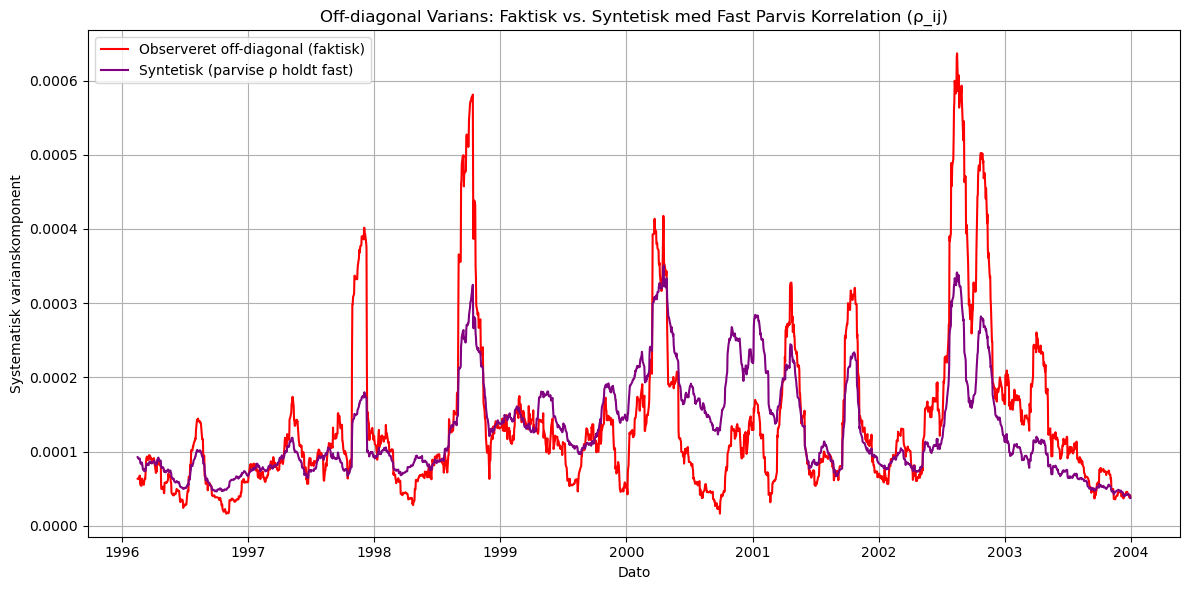

In [150]:
# Vælg om vi vil skalere syntetiske resultater
scale = False  # Sæt til True hvis du vil matche niveauer

# --------- Fast parvis korrelation (hele rho-matrix holdes fast) ---------

# Beregn gennemsnitlig korrelationsmatrix over hele perioden
full_corr = pivot_df.corr()
avg_corr_matrix = full_corr.values.copy()
np.fill_diagonal(avg_corr_matrix, 0)

synthetic_off_pairwise = []

for i in range(window, len(pivot_df)):
    window_returns = pivot_df.iloc[i - window:i]
    tickers = window_returns.columns
    N = len(tickers)
    if N < 2:
        continue

    cov_matrix = window_returns.cov()
    sigmas = np.sqrt(np.diag(cov_matrix.values))

    # Udtræk kun den relevante del af avg_corr_matrix for aktuelle tickers
    idx = [pivot_df.columns.get_loc(t) for t in tickers]
    rho_matrix = avg_corr_matrix[np.ix_(idx, idx)]

    sigma_outer = np.outer(sigmas, sigmas)
    synthetic_cov_off = rho_matrix * sigma_outer

    w = np.ones(N) / N
    w_matrix = np.outer(w, w)
    off_diag_mask = ~np.eye(N, dtype=bool)
    weighted_synthetic_off = synthetic_cov_off * w_matrix * off_diag_mask

    synthetic_value = np.sum(weighted_synthetic_off)
    synthetic_off_pairwise.append((pivot_df.index[i], synthetic_value))

synthetic_pairwise_df = pd.DataFrame(synthetic_off_pairwise, columns=["date", "synthetic_off_pairwise"])
compare_df_pairwise = pd.merge(decomp_df[["date", "off_diagonal"]], synthetic_pairwise_df, on="date", how="inner")

if scale:
    scaling_pairwise = (compare_df_pairwise["off_diagonal"] / compare_df_pairwise["synthetic_off_pairwise"]).mean()
    compare_df_pairwise["synthetic_plot"] = compare_df_pairwise["synthetic_off_pairwise"] * scaling_pairwise
else:
    compare_df_pairwise["synthetic_plot"] = compare_df_pairwise["synthetic_off_pairwise"]

plt.figure(figsize=(12, 6))
plt.plot(compare_df_pairwise["date"], compare_df_pairwise["off_diagonal"], label="Observeret off-diagonal (faktisk)", color="red")
plt.plot(compare_df_pairwise["date"], compare_df_pairwise["synthetic_plot"], label="Syntetisk (parvise ρ holdt fast)", color="purple")
plt.title("Off-diagonal Varians: Faktisk vs. Syntetisk med Fast Parvis Korrelation (ρ_ij)")
plt.xlabel("Dato")
plt.ylabel("Systematisk varianskomponent")
plt.legend(loc="upper left")
plt.grid(True)
plt.tight_layout()
plt.show()


### trading strategy implement

In [ ]:
[ '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

# 0203524D = NSM
# NRTLQ = NT
# MTLQQ = GM
# LEHMQ = LEH
# NAN = NQN
# RSHCQ = RSH
# 987200Q = MAY
# 748957Q = PNU
# 653707Q = T
# 605555Q = S
# 3621240Q = ONE
# 3605818Q = HCA
# 3346Q = UBAN
# 2968900Q = IHRT
# 2258717D = EMC
# GBLXQ = GBLX
# ENRNQ = ENE
# EKDKQ = KODK
# DALRQ = DAL
# RTN/B = RTNB
# 1996074D = EP
# 3393199Q = BUD
# 1683997D = DELL
# 0848680D = FYBR
# 1255173D = WB
# 2071296D = NYX
# 1856613D = MON
# BRK/B = BRK
# 9903115D = CLB
# 1028411Q = G
# 1697067D = DOW
# 1715651D = DD
